<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

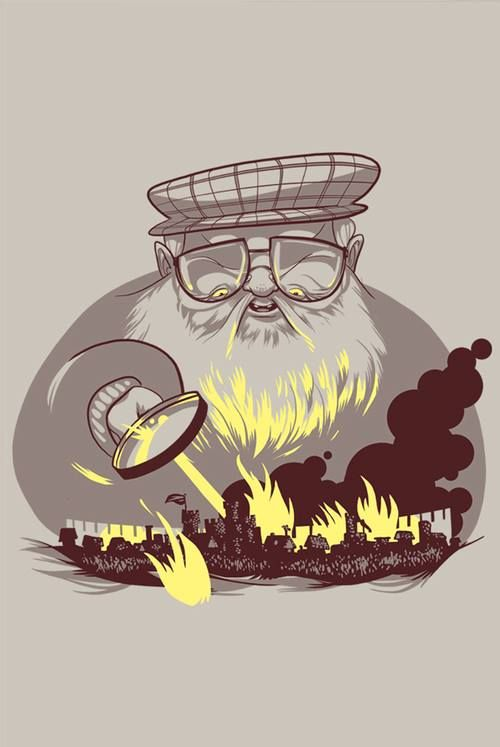

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [267]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /Users/daniilsergeev/Downloads/game_of_thrones_test.csv
100%|███████████████████████████████████████| 37.3k/37.3k [00:00<00:00, 459kB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /Users/daniilsergeev/Downloads/game_of_thrones_train.csv
100%|█████████████████████████████████████████| 138k/138k [00:00<00:00, 968kB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [269]:
train_data = pd.read_csv('/Users/daniilsergeev/Downloads/game_of_thrones_train.csv', index_col = 'S.No')
test_data = pd.read_csv('/Users/daniilsergeev/Downloads/game_of_thrones_test.csv', index_col = 'S.No')

display(train_data.head(), test_data.head())
print(train_data.info(), test_data.info())

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [270]:
total = train_data.shape[0]

missing_percentage = (train_data.isna().sum() / total) * 100
print(missing_percentage.apply(lambda x: f"{x:.2f}%")[missing_percentage > 0])

title            53.95%
culture          68.66%
dateOfBirth      82.08%
mother           98.84%
father           98.59%
heir             98.65%
house            24.47%
spouse           87.15%
isAliveMother    98.84%
isAliveFather    98.59%
isAliveHeir      98.65%
isAliveSpouse    87.15%
age              82.08%
dtype: object


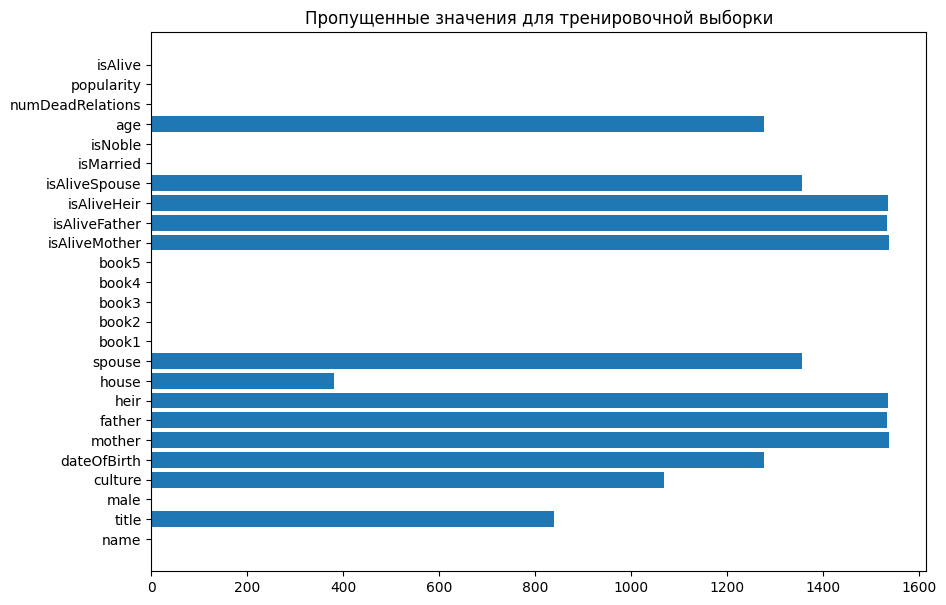

In [271]:
data = train_data.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data.index, data.values)
plt.title('Пропущенные значения для тренировочной выборки');

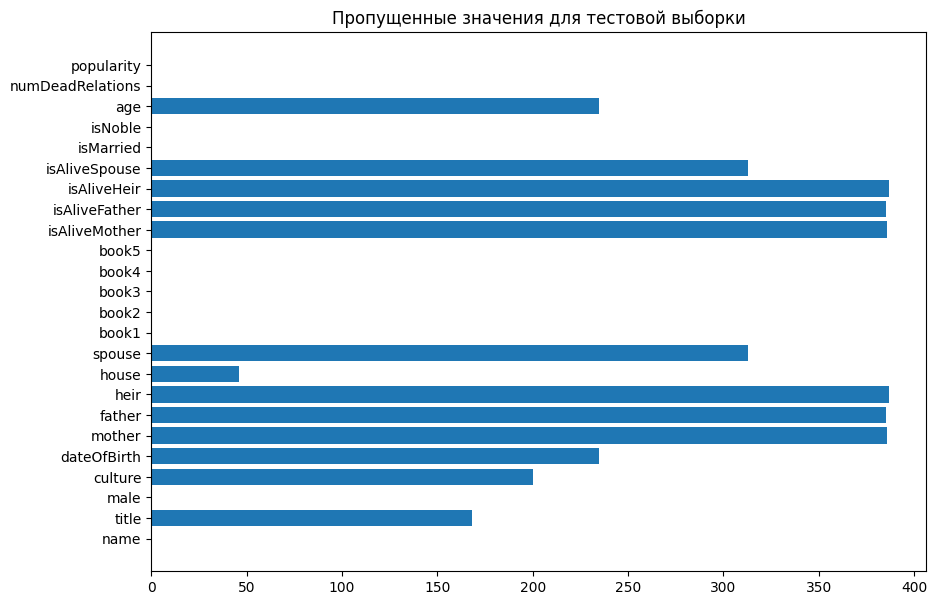

In [272]:
data = test_data.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data.index, data.values)
plt.title('Пропущенные значения для тестовой выборки');

В данных присутсвует большое количество пропусков. Чтобы понять, что с ними делать, посмотрим на распределение данных в каждом из столбцов с пропусками.

In [273]:
train_data.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


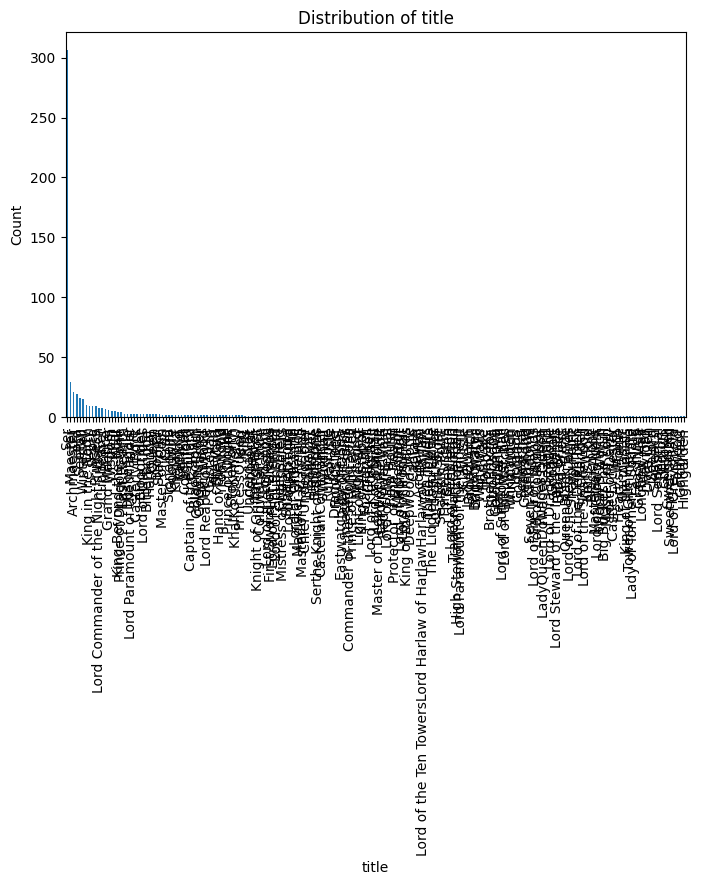

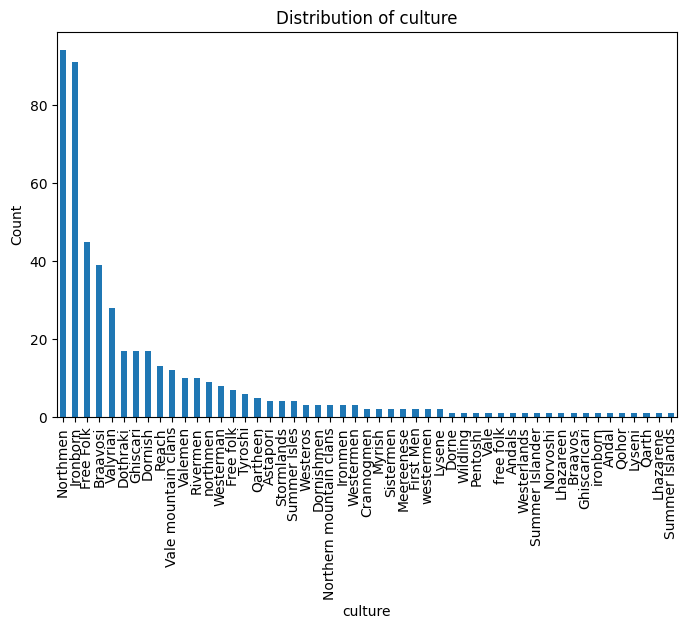

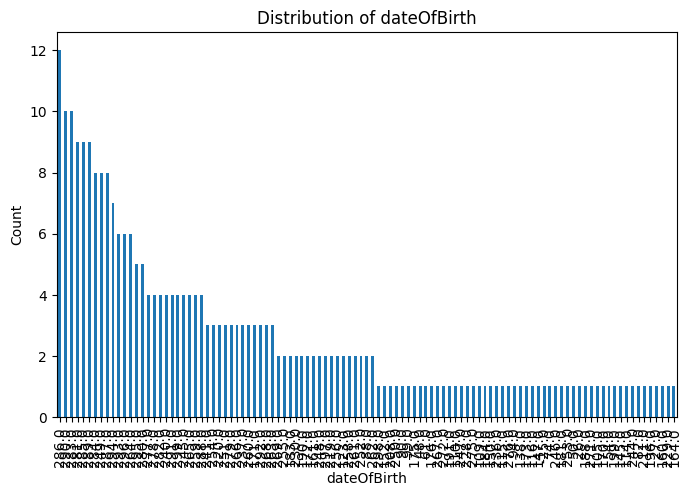

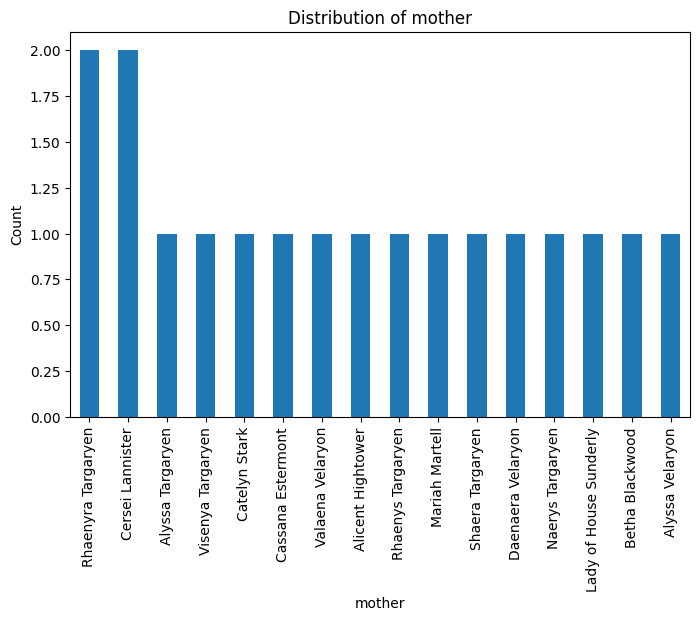

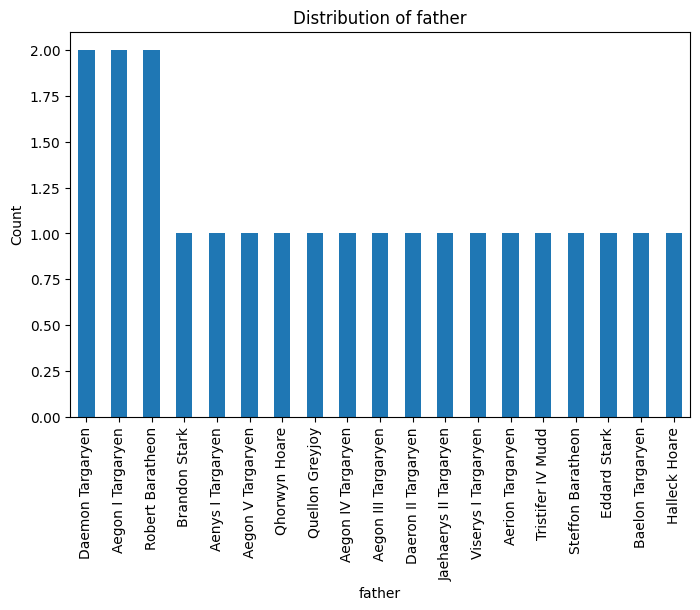

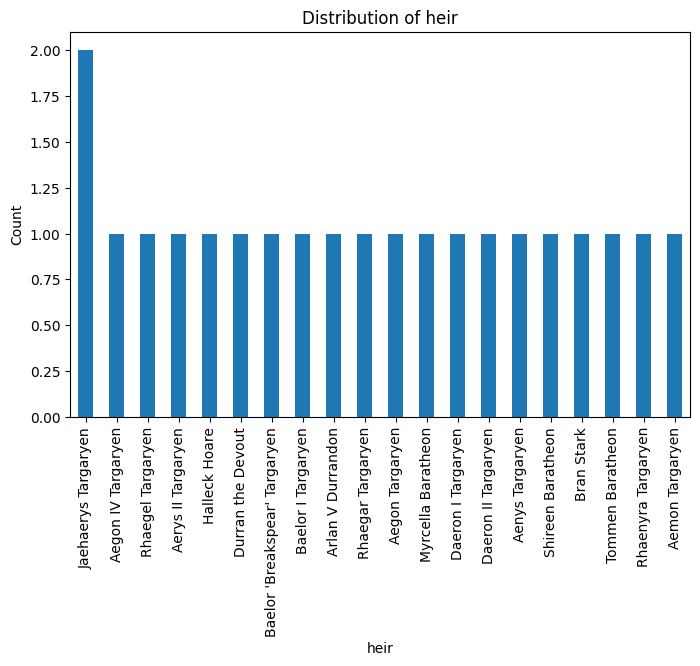

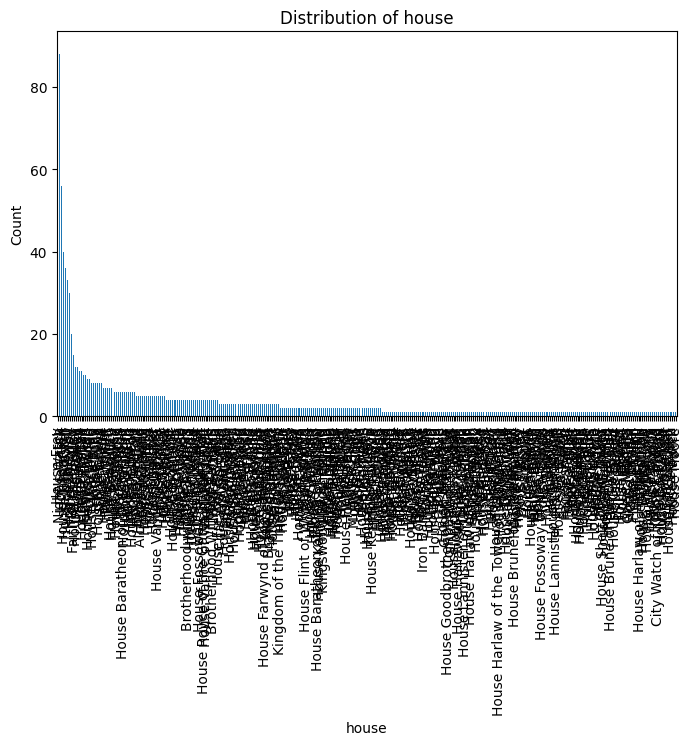

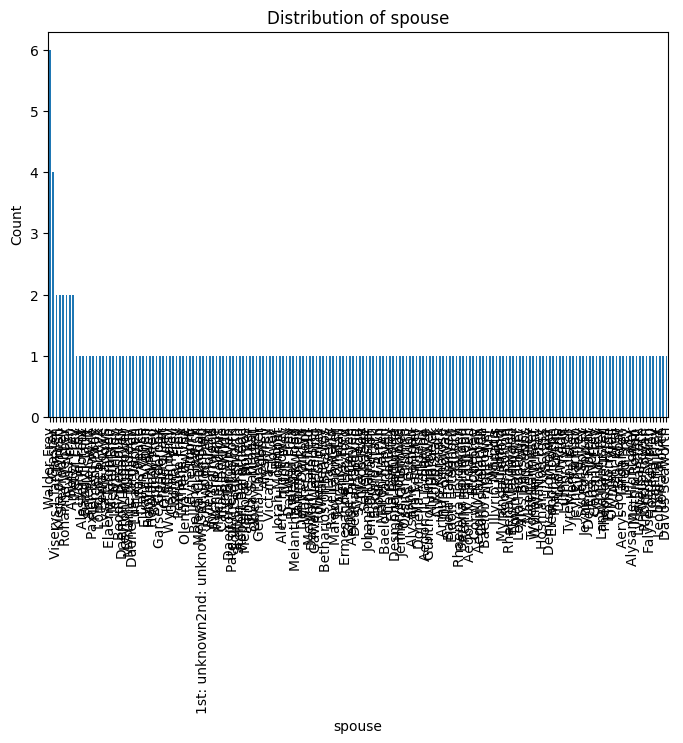

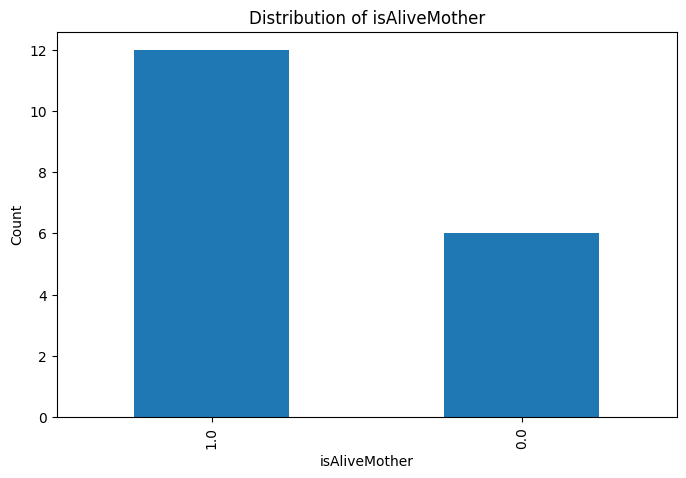

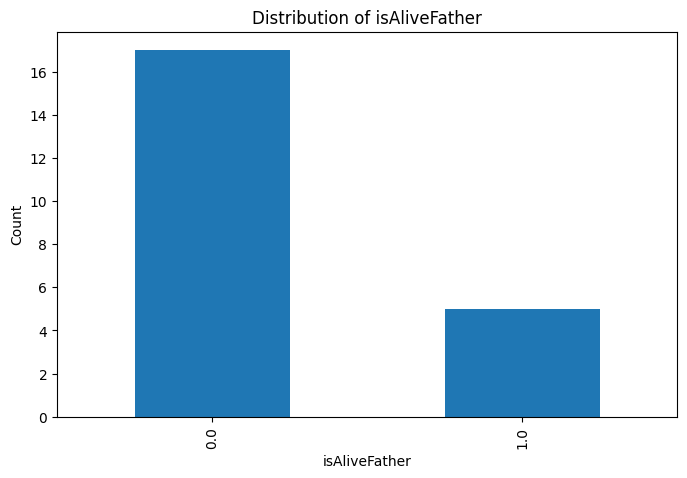

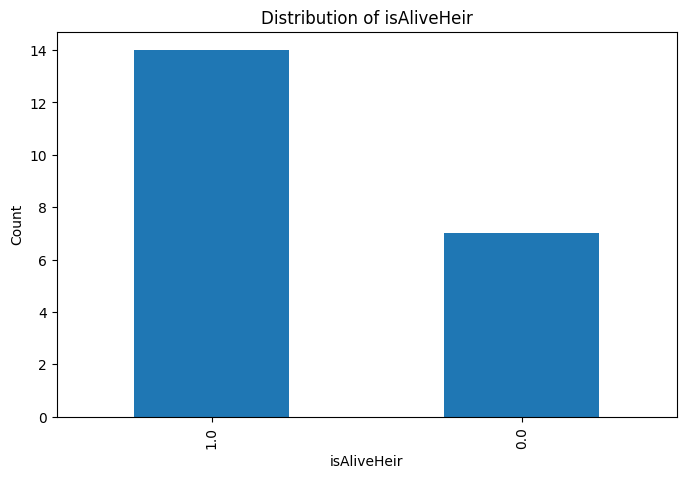

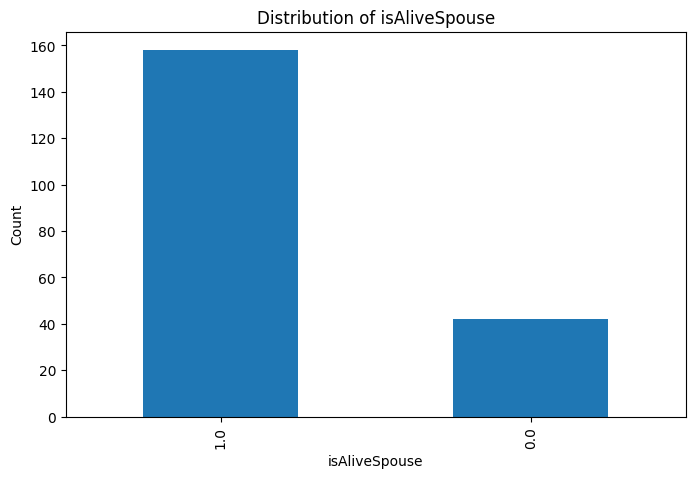

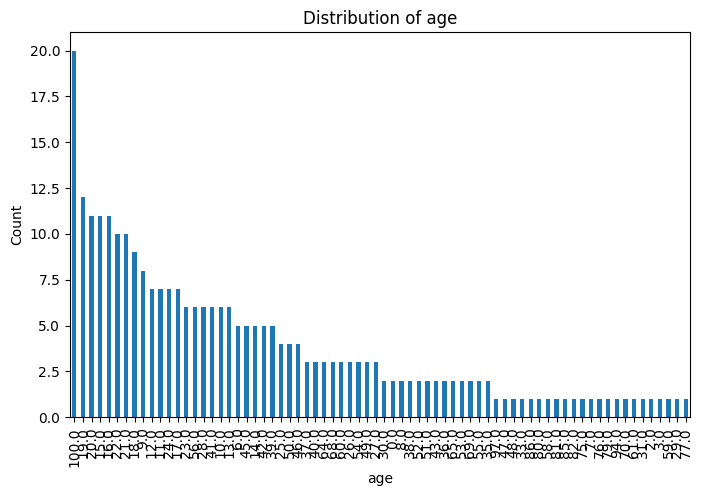

In [274]:
missing_columns = train_data.columns[train_data.isnull().sum() > 0]

for col in missing_columns:
    plt.figure(figsize=(8, 5))
    train_data[col].value_counts(dropna=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**Вывод по заданию 1.3**

1. Числовые данные с пропусками заполним медианным значением;
2. Категориальные данные с пропусками заполним модой;
3. Пропуски в признаках: mother, father, heir, spouse, isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse не будем заполнять, так как пропущенных значений в них очень много и никакой важности для задания в себе не несут. Удалим эти признаки в дальнейшем.
4. В столбце 'age' удалим значения, которые меньше 0.

In [275]:
numerical_columns = ['dateOfBirth', 'age']
for col in numerical_columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)


categorical_columns = ['house', 'culture', 'title']
for col in categorical_columns:
    most_frequent_value = train_data[col].mode()[0]
    most_frequent_value_test = test_data[col].mode()[0]
    train_data[col].fillna(most_frequent_value, inplace=True)
    test_data[col].fillna(most_frequent_value_test, inplace=True)

/var/folders/cv/bpvpy4v53j9cm7ndtk89793c0000gn/T/ipykernel_45581/3043684523.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
/var/folders/cv/bpvpy4v53j9cm7ndtk89793c0000gn/T/ipykernel_45581/3043684523.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [276]:
train_data.isna().sum()

name                   0
title                  0
male                   0
culture                0
dateOfBirth            0
mother              1539
father              1535
heir                1536
house                  0
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                    0
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

In [277]:
test_data.isna().sum()

name                  0
title                 0
male                  0
culture               0
dateOfBirth           0
mother              386
father              385
heir                387
house                 0
spouse              313
book1                 0
book2                 0
book3                 0
book4                 0
book5                 0
isAliveMother       386
isAliveFather       385
isAliveHeir         387
isAliveSpouse       313
isMarried             0
isNoble               0
age                   0
numDeadRelations      0
popularity            0
dtype: int64

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [278]:
# Создаем признак isPopular
train_data['isPopular'] = (train_data['popularity'] > 0.5).astype(int)
test_data['isPopular'] = (test_data['popularity'] > 0.5).astype(int)

# Создаем признак boolDeadRelations
train_data['boolDeadRelations'] = (train_data['numDeadRelations'] > 0).astype(int)
test_data['boolDeadRelations'] = (test_data['numDeadRelations'] > 0).astype(int)

In [279]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Упрощение признака culture
def simplify_culture(culture, cult_dict):
    for new_culture, old_cultures in cult_dict.items():
        if str(culture).lower() in old_cultures:
            return new_culture
    return culture

train_data['culture'] = train_data['culture'].apply(lambda x: simplify_culture(x, cult))
test_data['culture'] = test_data['culture'].apply(lambda x: simplify_culture(x, cult))

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

Удалим следующие признаки:
* mother - не относится к поставленному заданию + очень большое кол-во пропусков;
* father - не относится к поставленному заданию + очень большое кол-во пропусков;
* heir - не относится к поставленному заданию + очень большое кол-во пропусков;
* isAliveMother - не относится к поставленному заданию + очень большое кол-во пропусков;
* isAliveFather - не относится к поставленному заданию + очень большое кол-во пропусков;
* isAliveHeir - не относится к поставленному заданию + очень большое кол-во пропусков;
* isAliveSpouse - не относится к поставленному заданию + очень большое кол-во пропусков;
* spouse - не относится к поставленному заданию + очень большое кол-во пропусков;
* numDeadRelations - был создан новый признак на основе этого;
* name - не относится к поставленному заданию

In [280]:
columns_to_drop = ['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'spouse', 'name']

train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Тип целевой переменной: int64
Распределение классов:
isAlive
1    1212
0     345
Name: count, dtype: int64


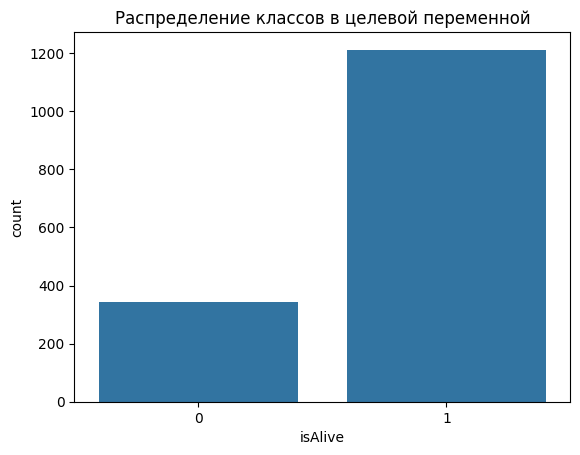

In [281]:
target_type = train_data['isAlive'].dtype
print(f"Тип целевой переменной: {target_type}")

# Шаг 2: Проверка на балансировку классов
class_counts = train_data['isAlive'].value_counts()
print("Распределение классов:")
print(class_counts)

# Визуализация распределения классов
sns.countplot(x='isAlive', data=train_data)
plt.title('Распределение классов в целевой переменной')
plt.show()

**Тренировочный датасет не является сбалансированным** — около 78% персонажей живы, и лишь около 22% мертвы. Это может привести к проблемам при обучении модели, так как модель может склоняться к предсказанию основного класса (живые персонажи).

**Балансировка датасета**

Новое распределение классов после oversampling:
isAlive
1    1212
0    1212
Name: count, dtype: int64


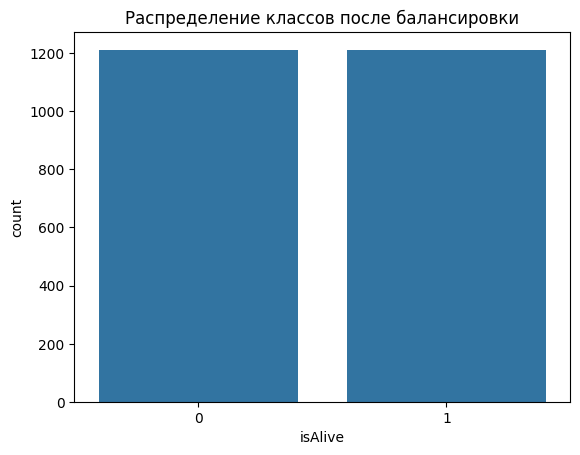

In [282]:
from sklearn.utils import resample

# Разделение на два класса
alive_data = train_data[train_data['isAlive'] == 1]
dead_data = train_data[train_data['isAlive'] == 0]

# Применяем oversampling для меньшего класса (мертвые)
dead_data_upsampled = resample(dead_data, 
                               replace=True,     # Случайное дублирование
                               n_samples=len(alive_data), # Уравнивание количества
                               random_state=42)  # Фиксируем random seed

# Объединение обратно в один набор данных
balanced_data = pd.concat([alive_data, dead_data_upsampled])

# Проверка нового распределения классов
print("Новое распределение классов после oversampling:")
print(balanced_data['isAlive'].value_counts())

# Визуализация нового распределения
sns.countplot(x='isAlive', data=balanced_data)
plt.title('Распределение классов после балансировки')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

**Кодирование категориальных признаков**

In [283]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def limit_top_categories(df, column, top_n=10):
    top_categories = df[column].value_counts().index[:top_n]
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    return df

for col in ['title', 'house', 'culture']:
    balanced_data = limit_top_categories(balanced_data, col)
    test_data = limit_top_categories(test_data, col)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_train = pd.DataFrame(encoder.fit_transform(balanced_data[['title', 'house', 'culture']]),
                             columns=encoder.get_feature_names_out(['title', 'house', 'culture']))

encoded_test = pd.DataFrame(encoder.transform(test_data[['title', 'house', 'culture']]),
                            columns=encoder.get_feature_names_out(['title', 'house', 'culture']))

balanced_data = balanced_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

train_data_encoded = pd.concat([balanced_data.drop(columns=['title', 'house', 'culture']),
                                encoded_train.reset_index(drop=True)], axis=1)
test_data_encoded = pd.concat([test_data.drop(columns=['title', 'house', 'culture']),
                               encoded_test.reset_index(drop=True)], axis=1)

display(train_data_encoded.head())
display(test_data_encoded.head())

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Dornish,culture_Dothraki,culture_Free Folk,culture_Ghiscari,culture_Ironborn,culture_Northmen,culture_Other,culture_Reach,culture_Valyrian,culture_Westermen
0,1,208.0,1,1,1,1,1,1,1,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,272.0,0,0,0,1,0,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,276.0,0,0,0,1,0,1,1,29.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,272.0,0,0,0,0,0,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,272.0,0,0,0,0,0,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Dornish,culture_Dothraki,culture_Free Folk,culture_Ghiscari,culture_Ironborn,culture_Northmen,culture_Other,culture_Reach,culture_Valyrian,culture_Westermen
0,0,156.0,0,0,0,0,1,0,0,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,267.0,0,1,1,1,1,0,0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,267.0,0,0,1,1,0,0,0,32.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,267.0,1,1,1,1,1,0,1,32.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,262.0,1,1,1,1,1,1,0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Анализ количественных признаков**

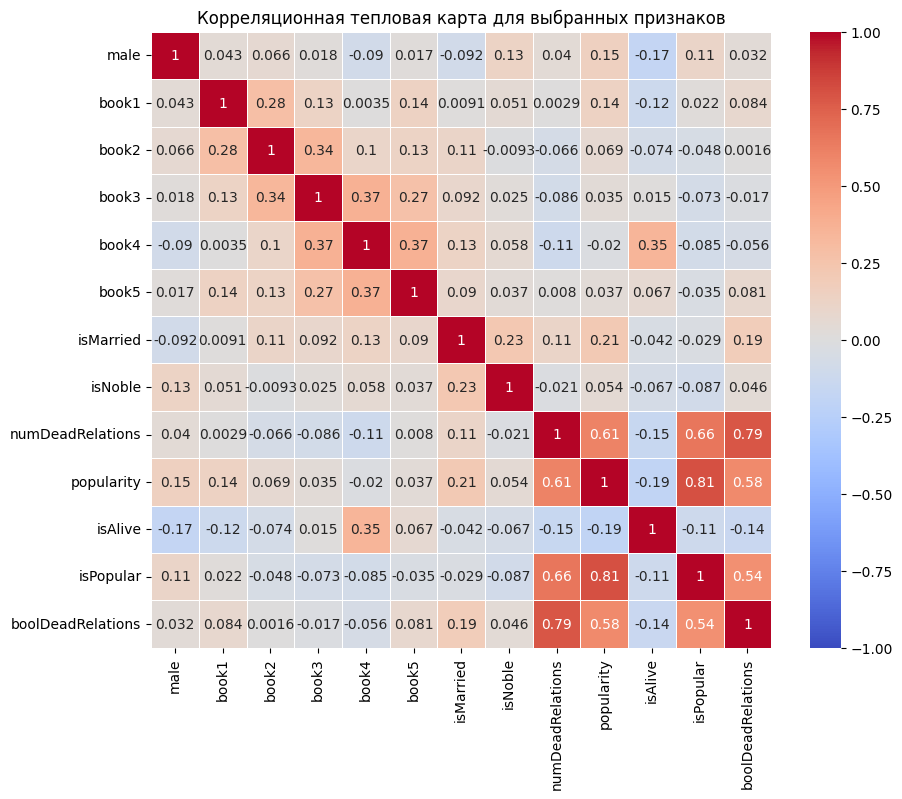

In [284]:
selected_features = ['male', 'book1', 'book2', 'book3', 'book4', 'book5',
                     'isMarried', 'isNoble', 'numDeadRelations', 'popularity', 
                     'isAlive', 'isPopular', 'boolDeadRelations']

# Вычислим матрицу корреляции для выбранных признаков
correlation_matrix_selected = train_data_encoded[selected_features].corr()

# Создадим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Корреляционная тепловая карта для выбранных признаков')
plt.show()

Корелляция наблюдается между признаками popularity и isPopular, что очень логично. Также наблюдается  корелляция между признаками boolDeadRelations и numDeadReleations. И также, есть корелляция между признаками isPopular и numDeadReleations, и между признаками boolDeadReleations и isPopular.

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

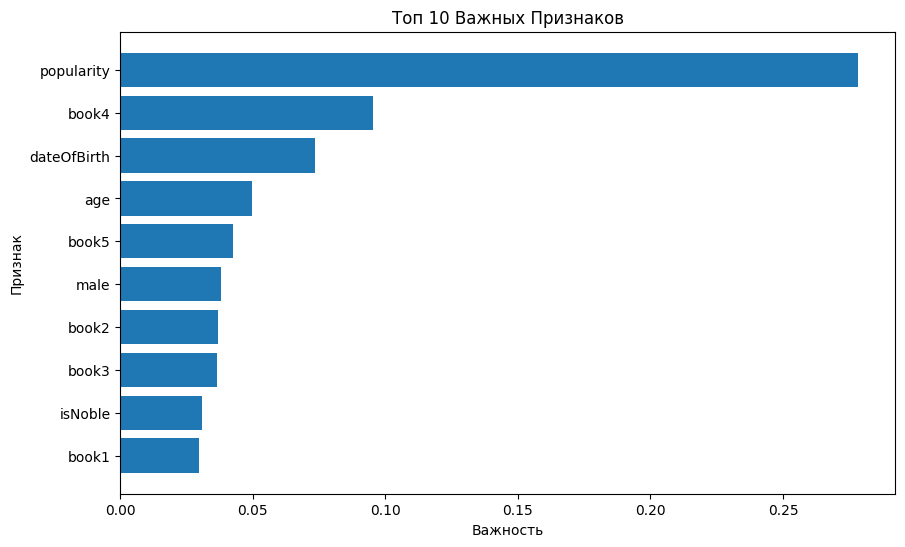

In [285]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X_train = train_data_encoded.drop(columns=['isAlive'])
y_train = train_data_encoded['isAlive']

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.title('Топ 10 Важных Признаков')
plt.gca().invert_yaxis()
plt.show()

* Признак popularity - это наиболее важный признак, который оказывает наибольшее влияние на предсказание того, жив ли персонаж
* Признак book4 — второй по значимости признак
* dateOfBirth и age — оба признака, связанные с возрастом, также оказывают значительное влияние. Это логично, так как возраст может напрямую влиять на вероятность того, что персонаж жив.
* Признаки, связанные с книгами (book2, book3, book5, book1) — все эти признаки имеют весомое влияние. Появление персонажа в определенной книге явно является важным фактором для предсказания.
* male (пол персонажа) — также один из важных признаков. Пол может влиять на продолжительность жизни персонажа.
* isNoble — статус дворянства также играет роль, что может свидетельствовать о том, что дворяне имеют разные шансы на выживание по сравнению с недворянами.
* house_Other — принадлежность к менее известным домам также оказывает некоторое влияние.

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [286]:
X = train_data_encoded.drop(columns=['isAlive'])  # Все признаки, кроме целевой переменной
y = train_data_encoded['isAlive']  # Целевая переменная 'isAlive'

# Выведем первые несколько строк для проверки
display(X.head())
display(y.head())

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Dornish,culture_Dothraki,culture_Free Folk,culture_Ghiscari,culture_Ironborn,culture_Northmen,culture_Other,culture_Reach,culture_Valyrian,culture_Westermen
0,1,208.0,1,1,1,1,1,1,1,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,272.0,0,0,0,1,0,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,276.0,0,0,0,1,0,1,1,29.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,272.0,0,0,0,0,0,0,0,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,272.0,0,0,0,0,0,0,1,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


0    1
1    1
2    1
3    1
4    1
Name: isAlive, dtype: int64

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выведем размеры получившихся выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1939, 47), (485, 47), (1939,), (485,))

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [289]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [290]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [291]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [292]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Шаг 1. Определяем пайплайн для каждой модели
models = {
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(C=1, random_state=42))]),
    'AdaBoost': Pipeline([('scaler', StandardScaler()), ('clf', AdaBoostClassifier(random_state=42))]),
    'Random Forest': Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier(random_state=42))]),
    'Gaussian Process': Pipeline([('scaler', StandardScaler()), ('clf', GaussianProcessClassifier(random_state=42))]),
    'Gaussian NB': Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'SVC': Pipeline([('scaler', StandardScaler()), ('clf', SVC(random_state=42))]),
    'Decision Tree': Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=42))])
}

# Шаг 2. Обучение каждой модели и предсказание
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)  # Обучение модели на тренировочных данных
    y_pred = pipeline.predict(X_test)
    print(f"{name} prediction on test_data_encoded: {y_pred[:5]}")  # Вывод первых 5 предсказаний для примера

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Logistic Regression prediction on test_data_encoded: [0 1 0 1 1]
AdaBoost prediction on test_data_encoded: [0 1 0 1 1]
Random Forest prediction on test_data_encoded: [0 0 0 1 1]
Gaussian Process prediction on test_data_encoded: [1 1 0 1 1]
Gaussian NB prediction on test_data_encoded: [0 0 0 1 1]
KNN prediction on test_data_encoded: [0 1 0 1 1]
SVC prediction on test_data_encoded: [0 1 0 1 1]
Decision Tree prediction on test_data_encoded: [0 1 0 1 1]


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [293]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [294]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7423


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [295]:
for name, pipeline in models.items():
    y_pred = pipeline.predict(X_test)  # Предсказания на тестовой выборке
    accuracy = accuracy_score(y_test, y_pred)  # Расчет accuracy
    print(f"{name} accuracy: {accuracy:.4f}")

Logistic Regression accuracy: 0.7443
AdaBoost accuracy: 0.8000
Random Forest accuracy: 0.9237
Gaussian Process accuracy: 0.8412
Gaussian NB accuracy: 0.6392
KNN accuracy: 0.8062
SVC accuracy: 0.7856
Decision Tree accuracy: 0.8845


Выберите лучшую модель.

Лучшей моделью является Random Forest с accuracy = 0.9237

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [298]:
y_pred = models['Random Forest'].predict(test_data_encoded)

In [299]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /Users/daniilsergeev/Downloads/submission.csv
100%|██████████████████████████████████████| 2.74k/2.74k [00:00<00:00, 6.15MB/s]


In [300]:
submission = pd.read_csv("/Users/daniilsergeev/Downloads/submission.csv", index_col='S.No')
submission['isAlive'] = y_pred

In [301]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [302]:
submission.to_csv("/Users/daniilsergeev/Downloads/new_submission.csv", index=False)